In [1]:
import numpy as np
import pandas as pd

<Axes: xlabel='time'>

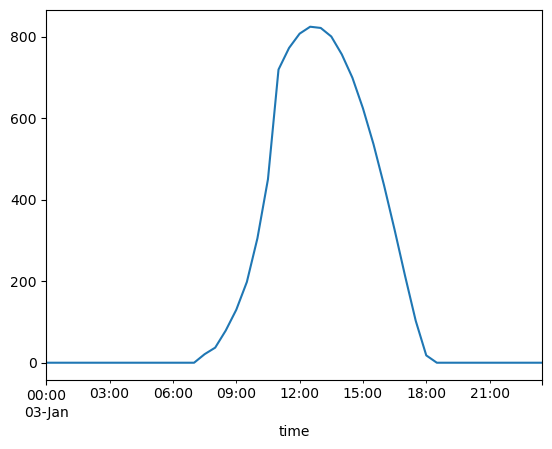

In [37]:
path_f = [ f"/Users/rodrigo/Downloads/{x}/" for x in
    ["118732a9814b1cce30be83ae6846c338", "09a3146f598250e494b17fd7ab2b228e",
     "8b72b6833ba8991908023140eb48e20f", "48b30806053e210f6a72f2563343323a"] ]
name_f = "1427192_19.42_-99.15_2022.csv"
lat = 19.42
lon = -99.15
df = pd.read_csv(path_f[2] + name_f, skiprows = 2)
# Convertimos a fecha.
df["time"] = pd.to_datetime( df["Year"].astype(int).astype(str)
    + "/" + df["Month"].astype(int).astype(str) + "/"
    + df["Day"].astype(int).astype(str) + " "
    + df["Hour"].astype(int).astype(str) + ":"
    + df["Minute"].astype(int).astype(str) + ":00" )
df = df.set_index("time").drop( columns =
    ["Year", "Month", "Day", "Hour", "Minute"] )
df.loc[ (df.index.month==1) & (df.index.day==3), "GHI" ].plot()

In [49]:
# Funciones trigonométricas.
def sin(x): return np.sin(np.radians(x))
def cos(x): return np.cos(np.radians(x))
def tan(x): return np.tan(np.radians(x))
def asin(x): return np.arcsin(x) * 180/np.pi
def acos(x): return np.arccos(x) * 180/np.pi
def atan(x): return np.arctan(x) * 180/np.pi

# Huso horario.
# La información está en UTC.
TZ = 0

In [46]:
# Eccentric anomaly of the earth in its orbit around the sun.
df["Day_Angle"] = 6.283185 * ( df.index.dayofyear - 1 ) / 365
# Declinación.
df["Declination"] = ( ( 0.006918 - 0.399912 * np.cos(df["Day_Angle"])
    + 0.070257*np.sin(df["Day_Angle"])
    - 0.006758*np.cos(2*df["Day_Angle"])
    + 0.000907*np.sin(2*df["Day_Angle"])
    - 0.002697*np.cos(3*df["Day_Angle"])
    + 0.00148*np.sin(3*df["Day_Angle"]) ) * 180/np.pi )
# Ecuación del tiempo.
df["Time_Equation"] = ( ( 0.000075 + 0.001868*np.cos(df["Day_Angle"])
    - 0.032077*np.sin(df["Day_Angle"])
    - 0.014615*np.cos(2*df["Day_Angle"])
    -0.040849*np.sin(2*df["Day_Angle"])) * 229.18 )
# Longitud del punto subsolar.
df["lon_subs"] = -15 * ( df.index.hour - TZ
    + df["Time_Equation"]/60 )
# Ángulo horario.
df["Hour_Angle"] = ( 15 * ( df.index.hour - 12
    - 0.5 + df["Time_Equation"]/60 + ((lon-TZ*15)*4)/60 ) )
# Posiciones del analema solar.
df["Sz"] = ( sin(lat)*sin(df["Declination"])
    - cos(lat)*cos(df["Declination"])
    *cos(df["lon_subs"]-lon) )
# Ángulo del cénit solar.
df["Zenith_Angle"] = acos(df["Sz"])
# Ángulo acimutal solar.
df["Azimuth_Angle"] = acos( ( sin(df["Declination"])
    - cos(df["Zenith_Angle"])*sin(lat) )
/ ( sin(df["Zenith_Angle"])*cos(lat) ) )
df["Azimuth_Angle"] = df["Azimuth_Angle"].where(
    df["Hour_Angle"] < 0, 360 - df["Azimuth_Angle"] )
# Masa de aire.
df["Air_Mass"] = ( 1/(cos(df["Zenith_Angle"])
    + 0.15/(93.885 - df["Zenith_Angle"])**1.253 )
    * df["Pressure"]/1013.25 )
df["Air_Mass"] = df["Air_Mass"].where( df["Zenith_Angle"] < 85.5, 0 )

df

,Wind Speed,Temperature,Pressure,DNI,GHI,no_track_azimth,no_track_altitude,Day_Angle,Declination,Time_Equation,lon_subs,Hour_Angle,Sz,Zenith_Angle,Azimuth_Angle,Air_Mass
time,,,,,,,,,,,,,,,,
2022-01-01 00:00:00,0.3,10.8,785,0,0,180,19.42,0.000000,-23.058629,-2.904169,0.726042,-287.376042,0.018608,88.933794,114.956741,0.000000
2022-01-01 00:30:00,0.4,10.7,785,0,0,180,19.42,0.000000,-23.058629,-2.904169,0.726042,-287.376042,0.018608,88.933794,114.956741,0.000000
2022-01-01 01:00:00,0.4,10.6,785,0,0,180,19.42,0.000000,-23.058629,-2.904169,-14.273958,-272.376042,-0.207727,101.989209,110.468647,0.000000
2022-01-01 01:30:00,0.4,10.5,785,0,0,180,19.42,0.000000,-23.058629,-2.904169,-14.273958,-272.376042,-0.207727,101.989209,110.468647,0.000000
2022-01-01 02:00:00,0.4,10.4,784,0,0,180,19.42,0.000000,-23.058629,-2.904169,-29.273958,-257.376042,-0.428781,115.390235,107.000246,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-31 21:30:00,0.8,11.4,785,0,0,180,19.42,6.265971,-23.130257,-2.453450,-314.386638,27.736638,0.577775,54.705769,220.546081,1.337389
2022-12-31 22:00:00,0.7,11.4,785,0,0,180,19.42,6.265971,-23.130257,-2.453450,-329.386638,42.736638,0.424127,64.904552,231.314266,1.817194
2022-12-31 22:30:00,0.5,11.2,785,0,0,180,19.42,6.265971,-23.130257,-2.453450,-329.386638,42.736638,0.424127,64.904552,231.314266,1.817194


In [53]:
azimuth_tracker = 180

df["no_track_Azimuth"]   = 180
df["no_track_Zenith"] = 90 - lat
df["R"] = ( atan( tan(df["Zenith_Angle"])
    * sin(df["Azimuth_Angle"] - azimuth_tracker) ) )
df["1_track_Altitude"] = 90 - df["R"]
df["1_track_Azimuth"] = 90
df["1_track_Azimuth"] = df["1_track_Azimuth"].where( df["R"] != 0,
    azimuth_tracker + asin( sin(df["R"]) / sin(np.abs(df["R"])) ) )
df["2_track_Azimuth"] = df["Azimuth_Angle"]
df["2_track_Zenith"] = df["Zenith_Angle"]
df["bifacial_vertical_azimuth"] = 270
df["bifacial_vertical_altitude"] = 90
df

,Wind Speed,Temperature,Pressure,DNI,GHI,no_track_azimth,no_track_altitude,Day_Angle,Declination,Time_Equation,...,1_track_azimuth,no_track_Azimuth,no_track_Zenith,R,1_track_Altitude,1_track_Azimuth,2_track_Azimuth,2_track_Zenith,bifacial_vertical_azimuth,bifacial_vertical_altitude
time,,,,,,,,,,,,,,,,,,,,,
2022-01-01 00:00:00,0.3,10.8,785,0,0,180,19.42,0.000000,-23.058629,-2.904169,...,90,180,70.58,-88.824015,178.824015,90,114.956741,88.933794,270,90
2022-01-01 00:30:00,0.4,10.7,785,0,0,180,19.42,0.000000,-23.058629,-2.904169,...,90,180,70.58,-88.824015,178.824015,90,114.956741,88.933794,270,90
2022-01-01 01:00:00,0.4,10.6,785,0,0,180,19.42,0.000000,-23.058629,-2.904169,...,90,180,70.58,77.228527,12.771473,90,110.468647,101.989209,270,90
2022-01-01 01:30:00,0.4,10.5,785,0,0,180,19.42,0.000000,-23.058629,-2.904169,...,90,180,70.58,77.228527,12.771473,90,110.468647,101.989209,270,90
2022-01-01 02:00:00,0.4,10.4,784,0,0,180,19.42,0.000000,-23.058629,-2.904169,...,90,180,70.58,63.604187,26.395813,90,107.000246,115.390235,270,90
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-31 21:30:00,0.8,11.4,785,0,0,180,19.42,6.265971,-23.130257,-2.453450,...,90,180,70.58,42.561503,47.438497,90,220.546081,54.705769,270,90
2022-12-31 22:00:00,0.7,11.4,785,0,0,180,19.42,6.265971,-23.130257,-2.453450,...,90,180,70.58,59.037015,30.962985,90,231.314266,64.904552,270,90
2022-12-31 22:30:00,0.5,11.2,785,0,0,180,19.42,6.265971,-23.130257,-2.453450,...,90,180,70.58,59.037015,30.962985,90,231.314266,64.904552,270,90
